In [33]:
from fitsio import FITS
import fitsio
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits 
import numpy as np
import os

# Check the whole running 
### The results is run with /global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_script.sh

In [253]:
!du -h --max-depth=1 /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4
!du -h --max-depth=1 /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/zcat.fits

128G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16
5.2M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/logs
128G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4
59M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/zcat.fits


# Check each branch memory of spectra folder
### The memory is not linearly distributed

In [3]:
!du -h --max-depth=1 /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16 |sort

1.1G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/13
1.2G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/8
1.6G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1
1.6G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/30
1.8G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/9
1002M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/15
11G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/17
11G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/3
11G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/5
128G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16
12G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/11
12G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/6
2.7G	/global/cscratch1/sd/tanting/mocks/q

# Look at each branch

In [4]:
!du -h --max-depth=1 /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1 |sort

1.6G	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1
102M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/140
115M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/132
116M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/130
118M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/133
119M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/129
120M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/128
120M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/131
122M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/137
128M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/138
132M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/134
136M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/

### The folders with 4.0k memory are empty
### Look at each realisation:

### The realisation with 3.2M memory, number 146: contains 6 quasar spectra
### The realisation with 136M memory, number 136: contains 278 quasar spectra
### Means that each quasar spectra takes around 0.5M memory

In [12]:
document_1 = FITS('/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/spectra-16-146.fits',vstorage='object')
document_2 = FITS('/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/136/spectra-16-136.fits',vstorage='object')
print('number of spectra of number 146 with 3.2M memory:',len(document_1['fibermap']['TARGETID'][:]))
print('number of spectra of number 136 with 136M memory:',len(document_2['fibermap']['TARGETID'][:]))

number of spectra of number 146 with 3.2M memory: 6
number of spectra of number 136 with 136M memory: 278


# Look at the truth and zbest file for each quasar spectra:
### Each truth file, zbest file takes ~ 5k memory

In [257]:
!du -ah /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146

32K	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/truth-16-146.fits
3.1M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/spectra-16-146.fits
28K	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/zbest-16-146.fits
3.2M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146


# Number of HDUs of each quasar spectra:

### wavelength, flux, ivar, mask and resolution of B,R,Z bands

In [13]:
document_1


  file: /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/spectra-16-146.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      FIBERMAP
  2      IMAGE_HDU       B_WAVELENGTH
  3      IMAGE_HDU       B_FLUX
  4      IMAGE_HDU       B_IVAR
  5      IMAGE_HDU       B_MASK
  6      IMAGE_HDU       B_RESOLUTION
  7      IMAGE_HDU       R_WAVELENGTH
  8      IMAGE_HDU       R_FLUX
  9      IMAGE_HDU       R_IVAR
  10     IMAGE_HDU       R_MASK
  11     IMAGE_HDU       R_RESOLUTION
  12     IMAGE_HDU       Z_WAVELENGTH
  13     IMAGE_HDU       Z_FLUX
  14     IMAGE_HDU       Z_IVAR
  15     IMAGE_HDU       Z_MASK
  16     IMAGE_HDU       Z_RESOLUTION

### In the fibermap

In [31]:
document_1['FIBERMAP'][:].dtype.names

('TARGETID',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SECONDARY_TARGET',
 'TARGET_RA',
 'TARGET_DEC',
 'TARGET_RA_IVAR',
 'TARGET_DEC_IVAR',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'PRIORITY',
 'SUBPRIORITY',
 'REF_ID',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'PMRA_IVAR',
 'PMDEC_IVAR',
 'RELEASE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERFLUX_W1',
 'FIBERFLUX_W2',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FIBERTOTFLUX_W1',
 'FIBERTOTFLUX_W2',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'EBV',
 'PHOTSYS',
 'OBSCONDITIONS',
 'NUMOBS_INIT',
 'PRIORITY_INIT',
 'NUMOBS_MORE',
 'HPXPIXEL',
 'FIBER',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBERSTATUS',
 'OBJTYPE',
 'LAMBDA_REF',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'FA_TARGET',
 'FA_TYPE',
 'NUMTARGET',
 'FIBER_RA',
 'FIBER_DEC',
 'FIBER_RA_IV

In [107]:
type(document_1['FIBERMAP'][:][0].tolist())

tuple

# Check if the wavelength of each realisation is the same

In [56]:
import operator

In [44]:
dir = '/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1'
files_total = []
for file in os.listdir(dir):
    files = os.listdir(dir + '/' + file)
    for files_single in files:
        if files_single.startswith('spectra'):
            files_total.append(dir + '/' + file + '/' + files_single)

In [59]:
wavelength_reference = FITS(files_total[0],vstorage='object')['B_WAVELENGTH'][:]
for file_index in files_total[1:]:
    wavelength_compare = FITS(file_index,vstorage='object')['B_WAVELENGTH'][:]
    if not set(wavelength_compare)==set(wavelength_reference):
        print('different wavelength array')

# Check in each spectra file, which part contains the most momery

In [60]:
!du /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/spectra_test.fits

3120	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/spectra_test.fits


In [192]:
!cp /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/spectra-16-146.fits /global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test.fits

for i in range(1,17):
    hdu = fits.open('/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test.fits')
    select = hdu[i]
    for j in range(1,16):
        hdu.pop(1)
    hdu[1] = select
    hdu.writeto('/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_{}.fits'.format(i),overwrite=True)

In [199]:
!du -a /global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/ |sort

24	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_1.fits
3120	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test.fits
32	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_7.fits
36	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_12.fits
36	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_2.fits
6356	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/
692	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_11.fits
76	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_10.fits
76	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_8.fits
76	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_9.fits
780	/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_6.fits
80	/global/cscratch1/sd/tanting/mocks/quickq

In [198]:
hdu = fits.open('/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_16.fits')
hdu.info()

Filename: /global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_test_16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  Z_RESOLUTION    1 ImageHDU        11   (2999, 13, 6)   float32   


# One can know that: for each quasar spectra:
## Each header information takes ~ 4 kb
## Each wavelength file takes ~ 6 kb
## Each flux,ivar,mask file takes ~ 15 kb
## Each resolution HDU takes ~ 115-164 kb, most of the memory

# Using the spectra convertion function in picca to get only the diagonal term of resolution:

In [315]:
def spectral_resolution_desi(reso_matrix, log_lambda):
    """Computes the spectral resolution for DESI spectra
    Args:
        reso_matrix: array
            Resolution matrix
        log_lambda: array or None - default: None
            Logarithm of the wavelength (in Angstroms)
    Returns:
        The spectral resolution
    """

    delta_log_lambda = ((log_lambda[-1] - log_lambda[0]) /
                        float(len(log_lambda) - 1))
    reso = np.clip(reso_matrix, 1.0e-6, 1.0e6)
    rms_in_pixel = (np.sqrt(1.0 / 2.0 / np.log(
        reso[len(reso) // 2][:] / reso[len(reso) // 2 - 1][:])) + np.sqrt(
            4.0 / 2.0 / np.log(
                reso[len(reso) // 2][:] / reso[len(reso) // 2 - 2][:]))) / 2.0

    reso_in_km_per_s = (rms_in_pixel * 3*10**8 * delta_log_lambda *
                        np.log(10.0))

    return reso_in_km_per_s

In [316]:
document = FITS('/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/1/146/spectra-16-146.fits',vstorage='object')

In [317]:
spectral_resolution_reform = spectral_resolution_desi(document['B_RESOLUTION'][0,:,:][0],np.log(document['B_WAVELENGTH'][:]))

In [318]:
hdu = fits.PrimaryHDU(spectral_resolution_reform)
hdul = fits.HDUList([hdu])
hdul.writeto('/global/cscratch1/sd/tanting/mocks/quickquasar/quickquasars_test/spectra_resolution.fits',overwrite=True)

# Check the pixels plots of each realisation, find the reason of empty files

In [210]:
file_zcat_all = FITS('/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/zcat.fits',vstorage='object')

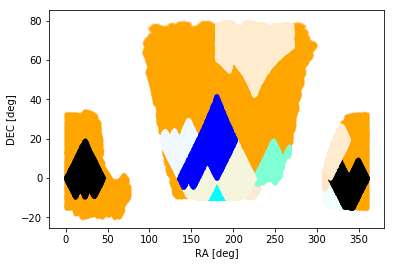

In [238]:
import matplotlib._color_data as mcd
plt.scatter(file_zcat_all[1]['RA'][:],file_zcat_all[1]['DEC'][:],marker='.',color = 'orange',alpha = 0.1);
realisation = os.listdir('/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16')
for real,color in zip(realisation[0:10],mcd.CSS4_COLORS):
    dir = '/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/' + real
    files_total = []
    for file in os.listdir(dir):
        files = os.listdir(dir + '/' + file)
        for files_zcat in files:
            if files_zcat.startswith('zbest'):
                file_zcat = FITS(dir + '/' + file + '/' + files_zcat,vstorage='object')
                plt.scatter(file_zcat[2]['FIBER_RA'][:],file_zcat[2]['FIBER_DEC'][:],marker='.',color = color,label = '1')
plt.xlabel('RA [deg]');
plt.ylabel('DEC [deg]');

# Within each realisation:

/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2 50


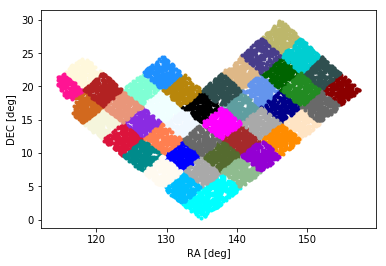

In [247]:
import matplotlib._color_data as mcd
#plt.scatter(file_zcat_all[1]['RA'][:],file_zcat_all[1]['DEC'][:],marker='.',color = 'orange',alpha = 0.1);
realisation = os.listdir('/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16')
for real in realisation[0:1]:
    dir = '/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/' + real
    print(dir,len(os.listdir(dir)))
    files_total = []
    for file,color in zip(os.listdir(dir),mcd.CSS4_COLORS):
        files = os.listdir(dir + '/' + file)
        for files_zcat in files:
            if files_zcat.startswith('zbest'):
                file_zcat = FITS(dir + '/' + file + '/' + files_zcat,vstorage='object')
                plt.scatter(file_zcat[2]['FIBER_RA'][:],file_zcat[2]['FIBER_DEC'][:],marker='.',color = color,label = '1')
plt.xlabel('RA [deg]');
plt.ylabel('DEC [deg]');

In [246]:
!du -h --max-depth=1 /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2 |sort

101M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/271
102M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/270
102M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/286
105M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/273
105M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/275
107M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/262
108M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/277
108M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/294
109M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/256
110M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/258
111M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/2/268
111M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-1

/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28 15


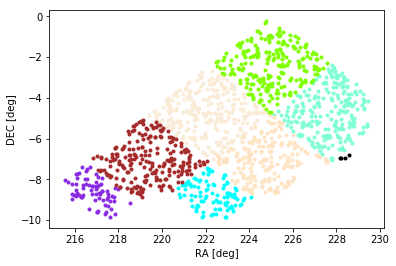

In [252]:
import matplotlib._color_data as mcd
#plt.scatter(file_zcat_all[1]['RA'][:],file_zcat_all[1]['DEC'][:],marker='.',color = 'orange',alpha = 0.1);
realisation = os.listdir('/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16')
for real in realisation[1:2]:
    dir = '/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/' + real
    print(dir,len(os.listdir(dir)))
    files_total = []
    for file,color in zip(os.listdir(dir),mcd.CSS4_COLORS):
        files = os.listdir(dir + '/' + file)
        for files_zcat in files:
            if files_zcat.startswith('zbest'):
                file_zcat = FITS(dir + '/' + file + '/' + files_zcat,vstorage='object')
                plt.scatter(file_zcat[2]['FIBER_RA'][:],file_zcat[2]['FIBER_DEC'][:],marker='.',color = color,label = '1')
plt.xlabel('RA [deg]');
plt.ylabel('DEC [deg]');

In [250]:
!du -h --max-depth=1 /global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28 |sort

107M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2811
112M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2815
113M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2813
128M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2814
2.2M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2807
35M	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2810
4.0K	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2801
4.0K	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2802
4.0K	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2803
4.0K	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2804
4.0K	/global/cscratch1/sd/tanting/mocks/quickquasar/tutorial-0.3-4/spectra-16/28/2805
4.0K	/global/cscratch1/sd/tanting/mocks/quickquasar/tut